In [1]:
data = [
        0.00000,
        0.05263,
        0.10526,
        0.15789,
        0.21053,
        0.26316,
        0.31579,
        0.36842,
        0.42105,
        0.47368,
        0.52632,
        0.57895,
        0.63158,
        0.68421,
        0.73684,
        0.78947,
        0.84211,
        0.89474,
        0.94737,
        1.00000
    ]

In [5]:
from scipy.stats import norm
import statistics as stats
from math import exp

def trimmed_mean(data):
    n = len(data)
    if n <= 5:
        return stats.mean(data)
    trim_portion = 1 / 2 / (n - 4)**.5
    num2trim = int(n * trim_portion)
    data_sorted = sorted(data.copy())
    return stats.mean(
        data_sorted[num2trim:-num2trim])


def var_1sample(data=None,
                alpha=0.05,
                s0=None
                ):
    n = len(data)
    std = stats.stdev(data)
    m = trimmed_mean(data)
    y = n / (n - 1) / (n - 1) * sum(((x - m) / std)**4 for x in data)
    se = ((y - (n - 3) / n) / (n - 1))**.5
    z_a2 = norm.ppf(1 - alpha / 2)
    if n <= z_a2:
        return None
    c_a2 = n / (n - z_a2)
    ll = (c_a2 * std * std * exp(-c_a2 * z_a2 * se))**.5
    ul = (c_a2 * std * std * exp(c_a2 * z_a2 * se))**.5

    return ll, ul

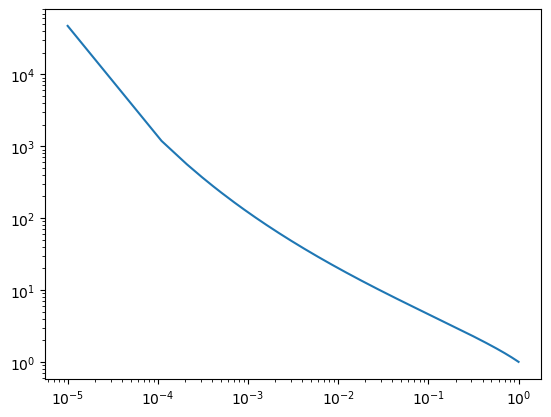

In [27]:
from matplotlib import pyplot as plt
import numpy as np

n = 6 # len(data)
std = stats.stdev(data)
m = trimmed_mean(data)
y = n / (n - 1) / (n - 1) * sum(((x - m) / std)**4 for x in data)
se = ((y - (n - 3) / n) / (n - 1))**.5
x=np.linspace(0.00001,.99999,10000)
z_a2=norm.ppf(1-x/2)
# print(z_a2)
c_a2=n/(n-z_a2)
y=np.sqrt(n/(n-z_a2) *  np.exp(n/(n-z_a2) * z_a2 * se))
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')

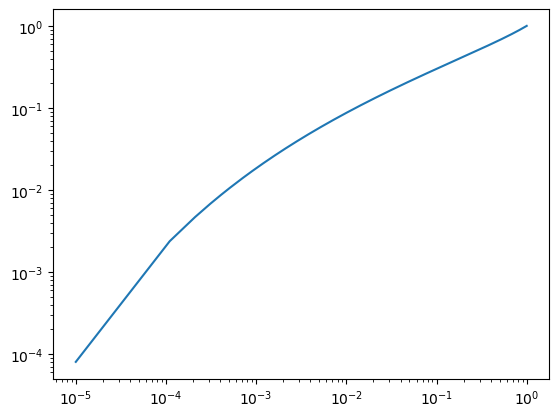

In [28]:
y=np.sqrt(n/(n-z_a2) *  np.exp(-n/(n-z_a2) * z_a2 * se))
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')